In [1]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
#import pysal
from shapely.geometry import Point

# code reference: http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/

In [2]:
cities = geopandas.read_file('nsf_grant_cities.csv')
funding_df = pd.read_csv("nsf_awards.csv")
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
states = geopandas.read_file("cb_2018_us_state_20m/cb_2018_us_state_20m.shp")

In [3]:
states = states[states.STATEFP.astype(int) < 60]
# Get rid of Hawaii and Alaska
states = states[~states.NAME.isin(['Hawaii', 'Alaska'])]

In [4]:
df = pd.read_csv("nsf_grant_cities.csv")

In [5]:
points = df.apply(lambda row: Point(row.lon, row.lat), axis=1)

In [6]:
labs = geopandas.GeoDataFrame(df, geometry=points)
labs.crs = {'init': 'epsg:4326'}

/home/sye22/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [7]:
award_amounts = {}
number_lab = {}
for index, row in funding_df.iterrows():
    if row['State'] not in award_amounts.keys():
        award_amounts[row['State']] = row['Amount']
        number_lab[row['State']] = 1
    else:
        award_amounts[row['State']] += row['Amount']
        number_lab[row['State']] += 1

In [8]:
states["funding"] = 0
states["labs"] = 0
states['ave_funding']=0
for i in range(len(states)):
    state_name = states.iloc[i,4]
    if state_name in award_amounts.keys():
        states.iloc[i,10] = award_amounts[state_name]
        states.iloc[i,11] = number_lab[state_name]
        states.iloc[i,12] = states.iloc[i,10]/states.iloc[i,11]


In [9]:
#https://geopandas.org/gallery/create_geopandas_from_pandas.html
leg_df = pd.DataFrame(
    {'Legend': ['>0', '>1e6', '>2e6', '>3e6', '>4e6', '>5e6', 'none', 'Labs receiving fundings'],
     'color' : ["#f1eef6","#d4b9da","#d4b9da","#df65b0","#e7298a","#ce1256","0.8", "blue"],
     'lat': [35,33.5,32,30.5,29,27.5,26,24.5],
     'lon': [-74, -74, -74, -74, -74, -74, -74, -74]})
leg_gdf = geopandas.GeoDataFrame(
    leg_df, geometry=geopandas.points_from_xy(leg_df.lon, leg_df.lat))

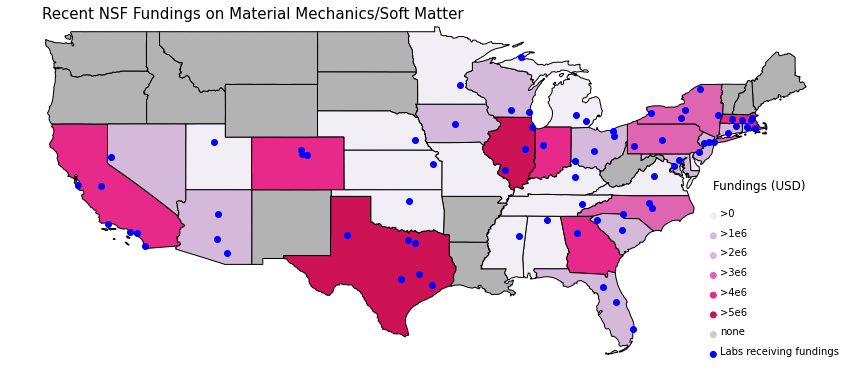

In [10]:
states_na = states.loc[states['funding']==0]
states_color = states[states['funding'] >= 0]
# code reference: https://geopandas.org/mapping.html
#fig, ax = plt.subplots(1, 1)
#ax = states_color.plot('funding', figsize = (15, 15),legend = True)
#states_na.plot(ax = ax, color="gray", figsize = (15, 15))
states["color"] = "0.7"
states.loc[states["funding"] > 0, "color"] = "#f1eef6"
states.loc[states["funding"] > 1e6, "color"] = "#d4b9da"
states.loc[states["funding"] > 2e6, "color"] = "#d4b9da"
states.loc[states["funding"] > 3e6, "color"] = "#df65b0"
states.loc[states["funding"] > 4e6, "color"] = "#e7298a"
states.loc[states["funding"] > 5e6, "color"] = "#ce1256"
ax = states.plot(color=states["color"],figsize = (15, 15),edgecolor = "black",legend=True)
labs.plot(ax = ax, color = "blue", figsize = (15,15))
leg_gdf.plot(ax = ax, color=leg_gdf['color'],figsize = (15,15))
ax.set_axis_off()
plt.annotate(s="Fundings (USD)", xy=[-74,37],horizontalalignment='left',size=12)
plt.annotate(s="Recent NSF Fundings on Material Mechanics/Soft Matter", xy=[-125,50],horizontalalignment='left',size=15)
for idx, row in leg_gdf.iterrows():
    plt.annotate(s=row['Legend'], xy=[row['lon']+0.5,row['lat']],
                 horizontalalignment='left')


In [13]:
ax.get_figure().savefig("map.svg", bbox_inches="tight")

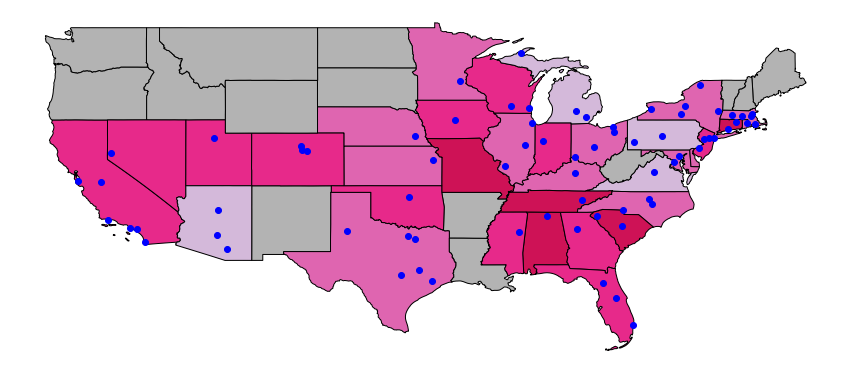

In [20]:
states_na = states.loc[states['ave_funding']==0]
states_color = states[states['ave_funding'] >= 0]
# code reference: https://geopandas.org/mapping.html
#fig, ax = plt.subplots(1, 1)
#ax = states_color.plot('funding', figsize = (15, 15),legend = True)
#states_na.plot(ax = ax, color="gray", figsize = (15, 15))
states["color"] = "0.7"
states.loc[states["ave_funding"] > 0, "color"] = "#f1eef6"
states.loc[states["ave_funding"] > 1e5, "color"] = "#d4b9da"
states.loc[states["ave_funding"] > 2e5, "color"] = "#d4b9da"
states.loc[states["ave_funding"] > 3e5, "color"] = "#df65b0"
states.loc[states["ave_funding"] > 4e5, "color"] = "#e7298a"
states.loc[states["ave_funding"] > 5e5, "color"] = "#ce1256"
ax = states.plot(color=states["color"],figsize = (15, 15),edgecolor = "black",legend=True)
labs.plot(ax = ax, color = "blue", figsize = (15,15))
#leg_gdf.plot(ax = ax, color=leg_gdf['color'],figsize = (15,15))
ax.set_axis_off()
#plt.annotate(s="Fundings (USD)", xy=[-74,37],horizontalalignment='left',size=12)
#plt.annotate(s="Recent NSF Fundings on Material Mechanics/Soft Matter", xy=[-125,50],horizontalalignment='left',size=15)
#for idx, row in leg_gdf.iterrows():
#    plt.annotate(s=row['Legend'], xy=[row['lon']+0.5,row['lat']],
#                 horizontalalignment='left')

In [21]:
ax.get_figure().savefig("map2.svg", bbox_inches="tight")